In [1]:
# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
# get heart_disease dataset
heart_disease = pd.read_csv("../data/heart-disease.csv")

In [4]:
# # Get California housing data
# from sklearn.datasets import fetch_california_housing
# housing = fetch_california_housing()
# housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
# housing_df["target"] = pd.Series(housing["target"]) # target = median house value

### 5.3 Hyperparameter tuning with GridSearchCV

In [5]:
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["sqrt", "log2"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [6]:
grid_2 = {"n_estimators": [100, 200, 500],
        "max_depth": [None],
        "max_features": [None, "sqrt"],
        "min_samples_split": [6],
        "min_samples_leaf": [1, 2]}

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, 

In [8]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [9]:
gs_clf.best_score_

0.8307823129251701

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [11]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.84
Recall: 0.82
F1 score: 0.83


In [12]:
type(gs_metrics)

dict

Let's compare our different models metrics.

In [13]:
baseline_metrics = {"accuracy": 0.80,
                    "precision": 0.77,
                    "recall": 0.92,
                    "f1": 0.84}
clf_2_metrics = {"accuracy": 0.82,
                "precision": 0.84,
                "recall": 0.84,
                "f1": 0.84}
rs_metrics = {"accuracy": 0.80,
                "precision": 0.84,
                "recall": 0.79,
                "f1": 0.81}
type(baseline_metrics)

dict

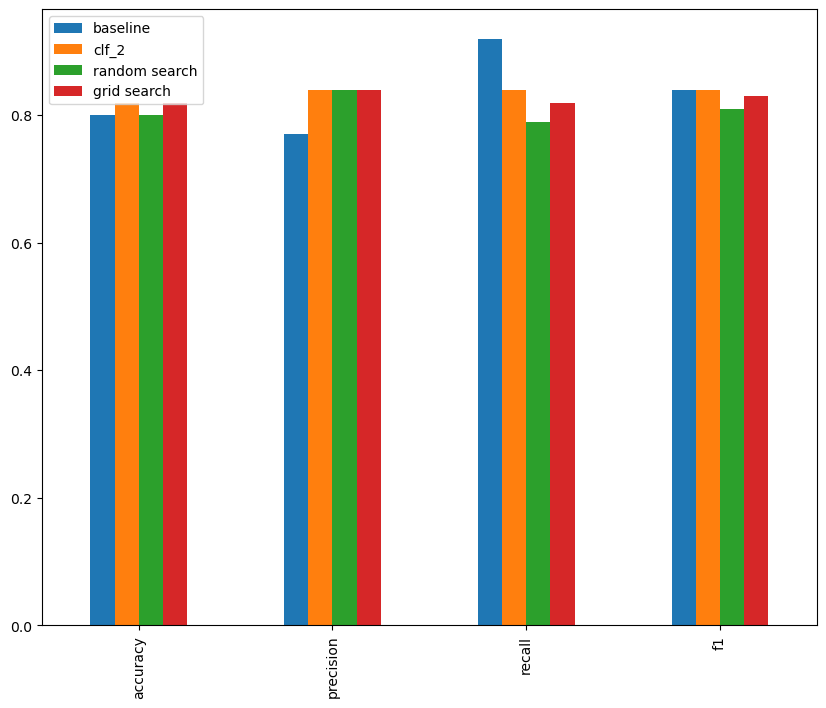

In [14]:
compare_metries = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metries.plot.bar(figsize=(10, 8));

In [15]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("05-3-gs_random_forest_model_1.pkl", "wb"))

In [16]:
# Load a saved model
loaded_pickle_model = pickle.load(open("05-3-gs_random_forest_model_1.pkl", "rb"))

In [17]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 81.97%
Precision: 0.84
Recall: 0.82
F1 score: 0.83


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.82, 'f1': 0.83}

In [18]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="05-3-gs_random_forest_model_1.joblib")

['05-3-gs_random_forest_model_1.joblib']

In [19]:
# Import a saved joblib model
loaded_joblib_model = load(filename="05-3-gs_random_forest_model_1.joblib")

In [20]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 81.97%
Precision: 0.84
Recall: 0.82
F1 score: 0.83


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.82, 'f1': 0.83}